<a href="https://colab.research.google.com/github/saspav/python_for_pro/blob/main/%D0%94%D0%BE%D0%BC%D0%B0%D1%88%D0%BD%D0%B5%D0%B5_%D0%B7%D0%B0%D0%B4%D0%B0%D0%BD%D0%B8%D0%B5_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Домашнее задание № 2


### Задание 1: Анализ данных о студентах с использованием NumPy


**Описание:**\
У вас есть данные о студентах, включающие оценки по различным предметам. Используйте библиотеку NumPy для анализа этих данных.

In [1]:
students_data = {
    'math': [85, 78, 92, 70, 88],
    'physics': [90, 82, 76, 85, 89],
    'informatics': [88, 92, 80, 87, 90]
}

students_data

{'math': [85, 78, 92, 70, 88],
 'physics': [90, 82, 76, 85, 89],
 'informatics': [88, 92, 80, 87, 90]}

**Задание:**
* Найдите среднюю оценку по каждому предмету.
* Найдите медианную оценку по каждому предмету.
* Вычислите стандартное отклонение по каждому предмету.
* Определите предмет с самой высокой средней оценкой.

In [2]:
import numpy as np

result = {}
for key, values in students_data.items():
    print(f'Предмет: {key}')
    for idx, (name_stat, func) in enumerate(zip(
            ('Средняя', 'Медианная', 'Стандартное отклонение'),
            (np.mean, np.median, np.std))):
        print(f'\t{name_stat} оценк{"иа"[idx < 2]}: {func(values):.1f}')
        # Сохраним в словарь среднюю оценку
        if not idx:
            result[key] = func(values)

# Список предметов
subjects = list(result.keys())
# Массив оценок
mean_scores = np.array(list(result.values()))
# Получаем предмет по индексу с максимальным значением массива
print('\nПредмет с самой высокой средней оценкой:', subjects[mean_scores.argmax()])

Предмет: math
	Средняя оценка: 82.6
	Медианная оценка: 85.0
	Стандартное отклонение оценки: 7.8
Предмет: physics
	Средняя оценка: 84.4
	Медианная оценка: 85.0
	Стандартное отклонение оценки: 5.1
Предмет: informatics
	Средняя оценка: 87.4
	Медианная оценка: 88.0
	Стандартное отклонение оценки: 4.1

Предмет с самой высокой средней оценкой: informatics


#### V2: Сделаем из словаря датафрейм и решение будет проще

In [3]:
import pandas as pd

df = pd.DataFrame(students_data)

# Получаем статистики
stats = df.describe()
for name_col in stats.columns:
    print(f'Предмет: {name_col}')
    for idx, (name_stat, func) in enumerate(zip(
            ('Средняя', 'Медианная', 'Стандартное отклонение'),
            ('mean', '50%', 'std'))):
        print(f'\t{name_stat} оценк{"иа"[idx < 2]}: {stats.loc[func, name_col]:.1f}')

print('\nПредмет с самой высокой средней оценкой:', stats.columns[stats.loc['mean'].argmax()])

Предмет: math
	Средняя оценка: 82.6
	Медианная оценка: 85.0
	Стандартное отклонение оценки: 8.7
Предмет: physics
	Средняя оценка: 84.4
	Медианная оценка: 85.0
	Стандартное отклонение оценки: 5.7
Предмет: informatics
	Средняя оценка: 87.4
	Медианная оценка: 88.0
	Стандартное отклонение оценки: 4.6

Предмет с самой высокой средней оценкой: informatics


### Задание 2: Анализ данных о продажах с использованием Pandas

**Описание:**\
Используйте библиотеку Pandas для анализа данных о продажах товаров. У вас есть данные о продажах товаров за последний год.

In [4]:
sales_data = {
    'Month': ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'],
    'Sales': [15000, 17000, 16000, 18000, 14000, 19000, 22000, 21000, 23000, 25000, 24000, 26000]
}
sales_data

{'Month': ['January',
  'February',
  'March',
  'April',
  'May',
  'June',
  'July',
  'August',
  'September',
  'October',
  'November',
  'December'],
 'Sales': [15000,
  17000,
  16000,
  18000,
  14000,
  19000,
  22000,
  21000,
  23000,
  25000,
  24000,
  26000]}

**Задание:**
* Найдите общий объем продаж за год.
* Найдите средний объем продаж в месяц.
* Найдите месяц с наибольшим и наименьшим объемом продаж.
* Постройте линейный график изменения объема продаж по месяцам (Matplotlib).

In [5]:
import pandas as pd

# Сделаем из словаря датафрейм
df = pd.DataFrame(sales_data)

print('Общий объем продаж за год:', df['Sales'].sum())
print('Cредний объем продаж в месяц:', df['Sales'].mean())
print('Месяц с наибольшим объемом продаж:', df.loc[df['Sales'].argmax(), 'Month'])
print('Месяц с наименьшим объемом продаж:', df.loc[df['Sales'].argmin(), 'Month'])

Общий объем продаж за год: 240000
Cредний объем продаж в месяц: 20000.0
Месяц с наибольшим объемом продаж: December
Месяц с наименьшим объемом продаж: May


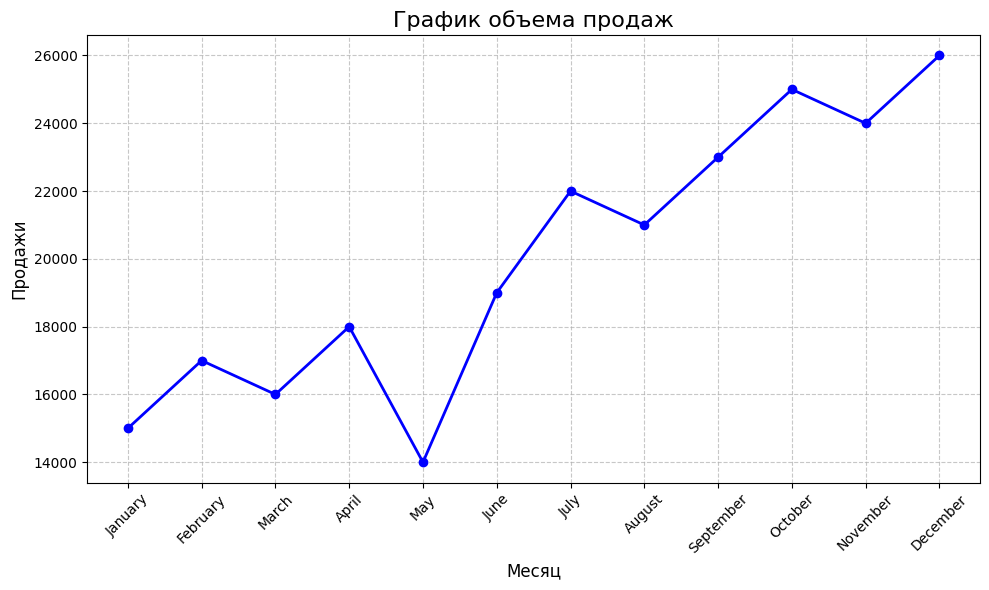

In [6]:
import matplotlib.pyplot as plt

# Создание графика
plt.figure(figsize=(10, 6))  # Установка размера графика
plt.plot(df['Month'], df['Sales'], marker='o', color='b', linestyle='-', linewidth=2)

# Настройка заголовка и подписей осей
plt.title('График объема продаж', fontsize=16)
plt.xlabel('Месяц', fontsize=12)
plt.ylabel('Продажи', fontsize=12)

# Поворот подписей месяцев для лучшей читаемости
plt.xticks(rotation=45)

# Добавление сетки
plt.grid(True, linestyle='--', alpha=0.7)

# Отображение графика
plt.tight_layout()  # Автоматическая подгонка layout
plt.show()

### Задание 3: Задание на визуализацию данных с использованием Seaborn

**Описание:**\
Используйте готовый набор данных из библиотеки Seaborn для создания различных типов графиков. \
Ваша задача — загрузить датасет ***tips*** из готового набора Seaborn и построить несколько базовых графиков для анализа данных.

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

df = sns.load_dataset('tips') # используйте строго данный датасет

df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


Постройте следующие графики:
* Линейный график
* Столбчатый график
* Гистограмма
* Диаграмма рассеяния

Условия:
* Параметры визуализации на ваш выбор
* Графики должны нести смысловую нагрузку

Датасет содержит семь колонок:

    total_bill — общая сумма, оплаченного заказа;
    tip — размер чаевых;
    sex — пол клиента;
    smoker — является ли клиент курильщиком (в 90-е годы в ресторанах США были зоны для курящих);
    day — день недели;
    time — время (ланч или обед);
    size — количество посетителей за столом.

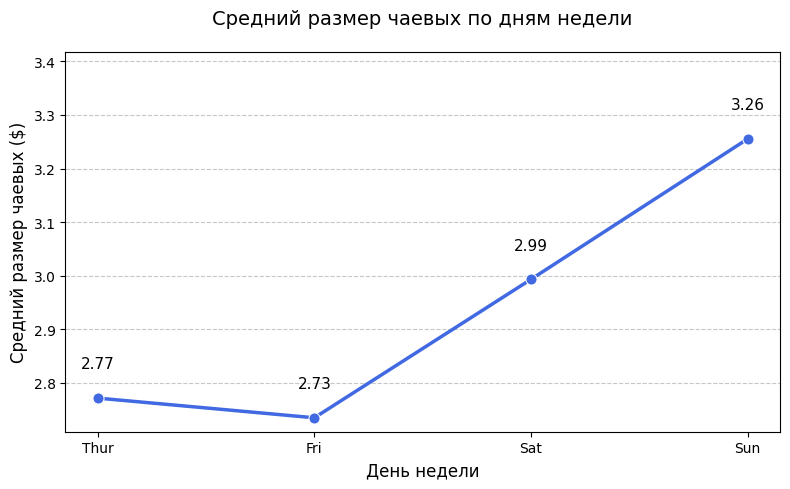

In [8]:
# Группируем данные по дням
daily_tips = df.groupby('day', observed=False, as_index=False)['tip'].mean()

# Упорядочиваем дни недели
days_order = ['Thur', 'Fri', 'Sat', 'Sun']
daily_tips['day'] = pd.Categorical(daily_tips['day'], categories=days_order, ordered=True)
daily_tips = daily_tips.sort_values('day')

# Строим график
plt.figure(figsize=(8, 5))
ax = sns.lineplot(data=daily_tips, x='day', y='tip',
                 marker='o', markersize=8, linewidth=2.5, color='royalblue')

# Оформление графика
plt.title('Средний размер чаевых по дням недели', fontsize=14, pad=20)
plt.xlabel('День недели', fontsize=12)
plt.ylabel('Средний размер чаевых ($)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Добавляем значения над точками
for index, row in daily_tips.iterrows():
    plt.text(row['day'], row['tip']+0.05, f"{row['tip']:.2f}",
             ha='center', va='bottom', fontsize=11)

# Устанавливаем лимит оси Y
max_tip = daily_tips['tip'].max() * 1.05
ax.set_ylim(top=max_tip)

plt.tight_layout()
plt.show()

#### Вывод: по выходным чаевых оставляют больше

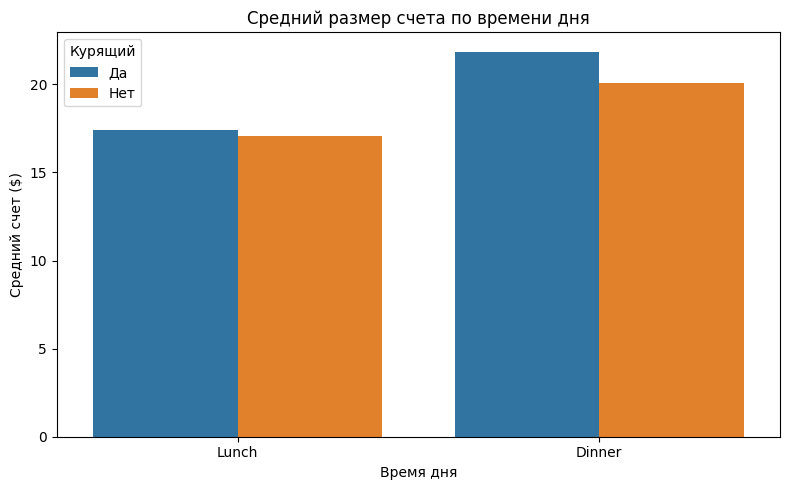

In [9]:
# 2. Столбчатый график: Средний счет по времени дня
plt.figure(figsize=(8, 5))
sns.barplot(
    data=df,
    x='time',
    y='total_bill',
    hue='smoker',
    estimator='mean',
    errorbar=None
)
plt.title('Средний размер счета по времени дня')
plt.xlabel('Время дня')
plt.ylabel('Средний счет ($)')
plt.legend(title='Курящий', labels=['Да', 'Нет'])
plt.tight_layout()
plt.show()

#### Вывод: средний чек больше за обедом и чек у курильщиков выше (видно сидят дольше)

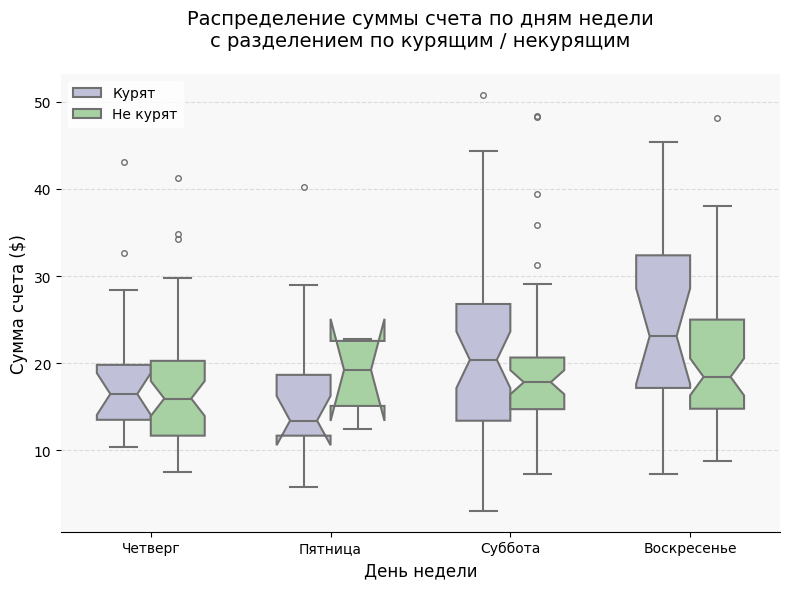

In [10]:
# Более расширенное исследование по пункту 2

plt.figure(figsize=(8, 6))

# Настраиваем палитру (используем приглушенные тона)
# Пастельные тона
custom_palette = ["#bcbddc", "#a1d99b"]

# Строим boxplot
ax = sns.boxplot(
    x="day",
    y="total_bill",
    data=df,
    hue="smoker",
    palette=custom_palette,
    linewidth=1.5,
    width=0.6,
    fliersize=4,
    notch=True,  # добавляем вырезы для медиан
)

# Настройка внешнего вида
plt.title("Распределение суммы счета по дням недели\nс разделением по курящим / некурящим",
          fontsize=14, pad=20)
plt.xlabel("День недели", fontsize=12)
plt.ylabel("Сумма счета ($)", fontsize=12)

# Улучшаем легенду
handles, labels = ax.get_legend_handles_labels()
plt.legend(
    handles,
    ["Курят", "Не курят"],
#     title="Курение",
    frameon=True,
    framealpha=0.8,
    edgecolor='white'
)

# Настраиваем сетку и фон
ax.grid(axis='y', linestyle='--', alpha=0.4)
ax.set_facecolor('#f8f8f8')

# Правильный способ установки русских названий дней
days_translation = {
    'Thur': 'Четверг',
    'Fri': 'Пятница',
    'Sat': 'Суббота',
    'Sun': 'Воскресенье'
}

# Создаем список переведенных меток в правильном порядке
translated_labels = [days_translation.get(label.get_text(), label.get_text())
                    for label in ax.get_xticklabels()]

# Альтернативный способ (еще лучше):
ax.set_xticks(ax.get_xticks())  # Фиксируем позиции тиков
ax.set_xticklabels(['Четверг', 'Пятница', 'Суббота', 'Воскресенье'])

# Убираем лишние рамки
sns.despine(left=True)

plt.tight_layout()
plt.show()

#### Вывод: курильщики в основном делают кассу в выходные.

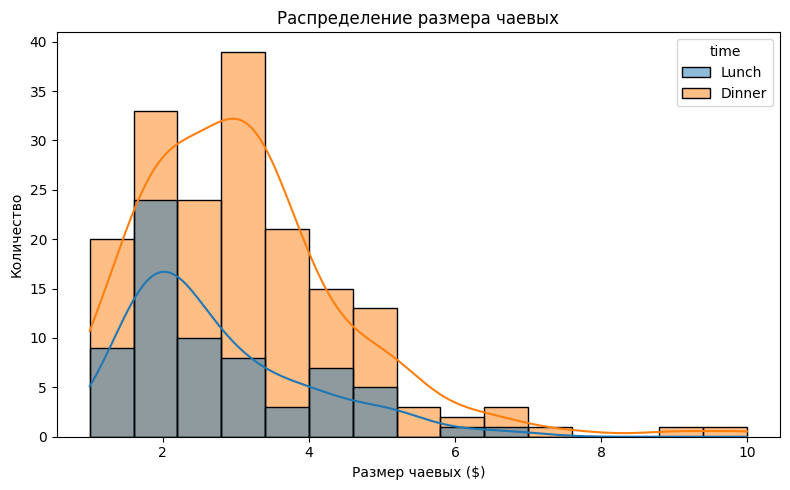

In [11]:
# 3. Гистограмма: Распределение размера чаевых
plt.figure(figsize=(8, 5))
sns.histplot(
    data=df,
    x='tip',
    bins=15,
    kde=True,
    hue='time'
)
plt.title('Распределение размера чаевых')
plt.xlabel('Размер чаевых ($)')
plt.ylabel('Количество')
plt.tight_layout()
plt.show()

#### Вывод: в обед средний размер чаевых почти в 2 раза выше, чем во время ланча

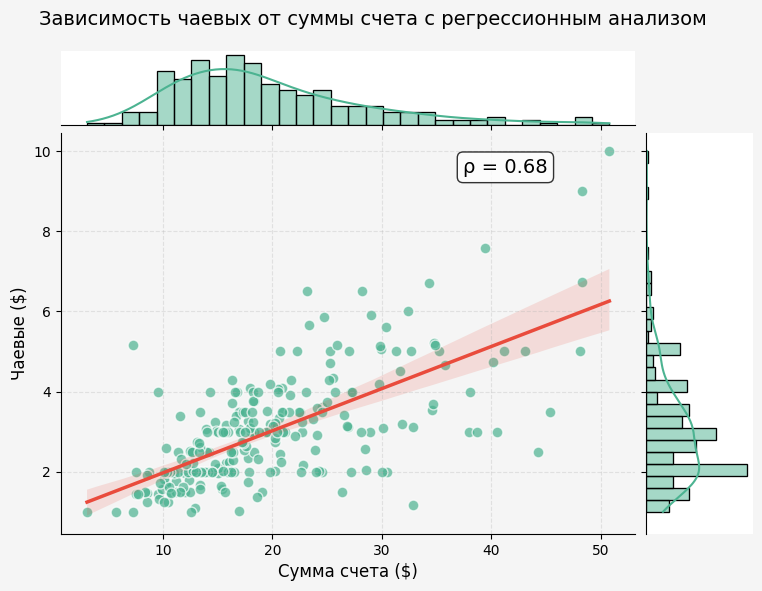

In [12]:
# 4. Диаграмма рассеяния: Связь между счетом и чаевыми

jp = sns.jointplot(
    x='total_bill',
    y='tip',
    data=df,
    kind='reg',

    # Параметры визуализации
    ratio=5,                     # Соотношение основного графика и границ
    space=0.1,                   # Пространство между графиками

    # Цвета и стили
    color='#4CB391',             # Основной цвет точек
    line_kws={'color': '#E94B3C', 'lw': 2.5},  # Линия регрессии
    scatter_kws={'s': 60, 'alpha': 0.7, 'edgecolor': 'w'},

    # Маргинальные распределения
    marginal_kws={
        'bins': 30,
        'kde': True,
        'color': '#4CB391',
    }
)
# После создания jointplot явно зададим размер фигуры
jp.fig.set_size_inches(8, 5.5)

# Добавляем заголовки и подписи
jp.fig.suptitle('Зависимость чаевых от суммы счета с регрессионным анализом', y=1.05, fontsize=14)
jp.ax_joint.set_xlabel('Сумма счета ($)', fontsize=12)
jp.ax_joint.set_ylabel('Чаевые ($)', fontsize=12)

# Добавляем коэффициент корреляции
corr = df['total_bill'].corr(df['tip'])
jp.ax_joint.annotate(f'ρ = {corr:.2f}',
                   xy=(0.7, 0.9),
                   xycoords='axes fraction',
                   fontsize=14,
                   bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

# Настраиваем сетку
jp.ax_joint.grid(True, linestyle='--', alpha=0.3)

# Изменяем цвет фона
jp.fig.set_facecolor('#F5F5F5')
jp.ax_joint.set_facecolor('#F5F5F5')

plt.show()

#### Вывод: линейная зависимость чаевых от чека со средней корреляцией = 0,68.

## Практическая часть
### Задача 1: Визуализация данных о доходах и расходах
Используйте библиотеку Matplotlib для визуализации данных о доходах и расходах.

У вас есть данные о доходах и расходах за несколько лет по месяцам.

Ваша задача — создать линейные графики для отображения доходов и расходов по месяцам, а также столбчатый график для сравнения общего дохода и расхода за год.

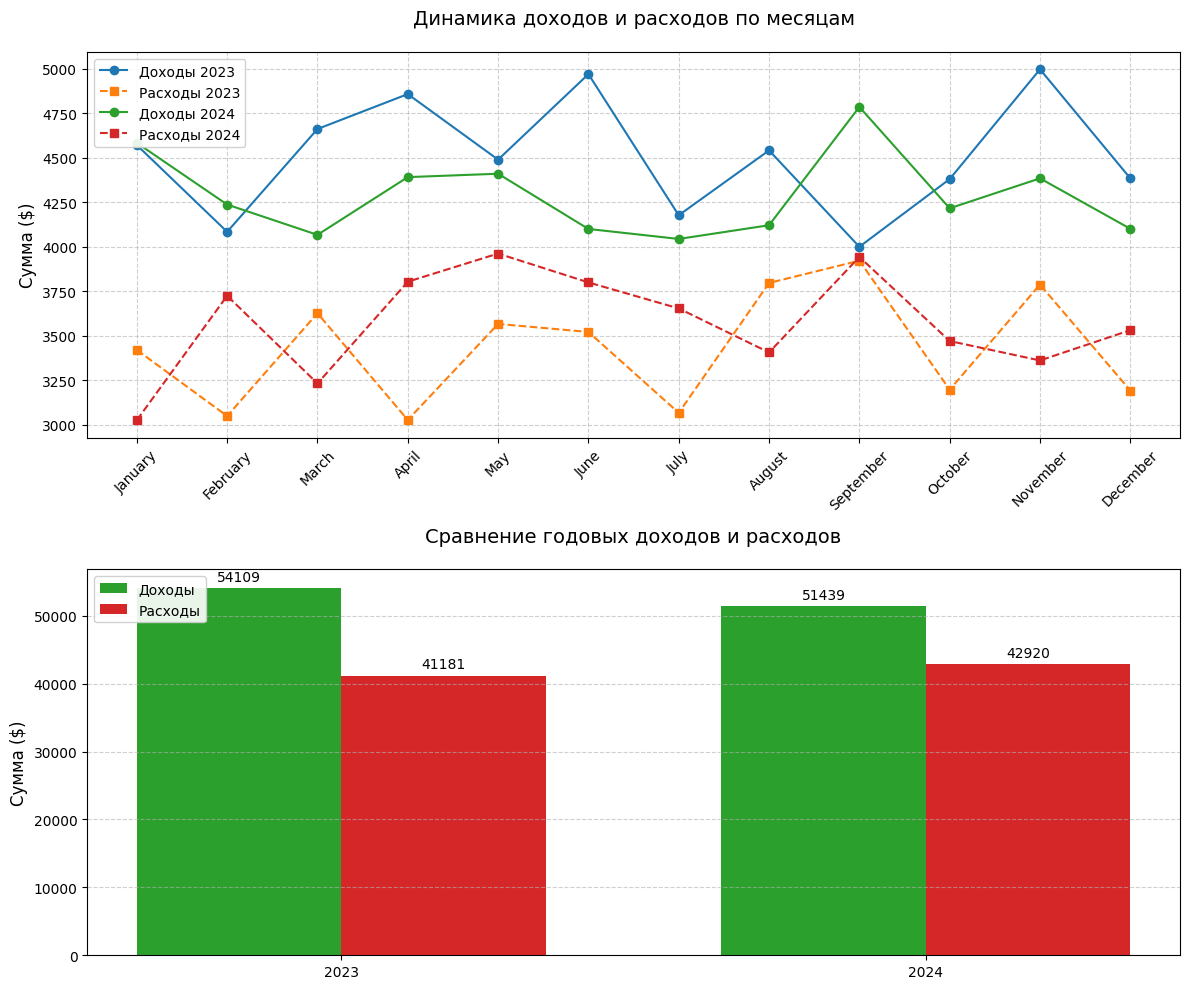

In [13]:
import numpy as np
import pandas as pd
import random
import calendar
import matplotlib.pyplot as plt


# Добавляем значения на столбцы
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax2.annotate(f'{height:.0f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')


# Фиксируем сид
random.seed(2025)

# Генерация данных
years = [2023]*12 + [2024]*12
months = list(calendar.month_name)[1:] * 2
incomes = [random.randrange(4000, 5000) for _ in range(24)]
expenses = [random.randrange(3000, 4000) for _ in range(24)]

# Создание DataFrame
df = pd.DataFrame({
    'Year': years,
    'Month': months,
    'Income': incomes,
    'Expense': expenses
})

# Создаем фигуру с 2 подграфиками
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))

# График 1: Линейные графики доходов и расходов по месяцам
for year in [2023, 2024]:
    mask = df['Year'] == year
    ax1.plot(df[mask]['Month'], df[mask]['Income'],
             marker='o', label=f'Доходы {year}')
    ax1.plot(df[mask]['Month'], df[mask]['Expense'],
             marker='s', linestyle='--', label=f'Расходы {year}')

ax1.set_title('Динамика доходов и расходов по месяцам', fontsize=14, pad=20)
ax1.set_ylabel('Сумма ($)', fontsize=12)
ax1.legend(loc='upper left', framealpha=0.9)
ax1.grid(True, linestyle='--', alpha=0.6)
ax1.tick_params(axis='x', rotation=45)

# График 2: Столбчатая диаграмма сравнения годовых сумм
yearly_data = df.groupby('Year').sum()
x = np.arange(len(yearly_data.index))  # позиции годов
width = 0.35  # ширина столбцов

rects1 = ax2.bar(x - width/2, yearly_data['Income'], width,
                label='Доходы', color='#2ca02c')
rects2 = ax2.bar(x + width/2, yearly_data['Expense'], width,
                label='Расходы', color='#d62728')

ax2.set_title('Сравнение годовых доходов и расходов', fontsize=14, pad=20)
ax2.set_ylabel('Сумма ($)', fontsize=12)
ax2.set_xticks(x)
ax2.set_xticklabels(yearly_data.index)
ax2.legend(loc='upper left', framealpha=0.9)
ax2.grid(True, linestyle='--', alpha=0.6, axis='y')

autolabel(rects1)
autolabel(rects2)

plt.tight_layout()
plt.show()